This is a short sample project using code provided by Codecademy from [streeteasy's](https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv) data.

We will be using simple linear regression to answer a couple basic questions:



## Questions looking to answer:
1. Does having a washer/dryer in unit increase the price of rent?
2. How costly is living by a subway station (in Brooklyn/Queens)?
3. Is a tenant over or underpaying?

We will begin by importing the appropriate libraries and data.

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
sns.set()
plt.rcParams['figure.dpi']= 150

In [76]:
data = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/streeteasy.csv')
data.head()

,rental_id,building_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,submarket,borough
0,1545,44518357,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,All Upper East Side,Manhattan
1,2472,94441623,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,All Downtown,Manhattan
2,10234,87632265,3000,3.0,1,1000,4,1.0,106,0,0,0,0,0,0,0,0,Astoria,Northwest Queens,Queens
3,2919,76909719,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,All Midtown,Manhattan
4,2790,92953520,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,All Downtown,Manhattan


We will be paying particular attention to the 'rent', 'min_to_subway', and 'has_washer_dryer' columns.

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         5000 non-null   int64  
 1   building_id       5000 non-null   int64  
 2   rent              5000 non-null   int64  
 3   bedrooms          5000 non-null   float64
 4   bathrooms         5000 non-null   int64  
 5   size_sqft         5000 non-null   int64  
 6   min_to_subway     5000 non-null   int64  
 7   floor             5000 non-null   float64
 8   building_age_yrs  5000 non-null   int64  
 9   no_fee            5000 non-null   int64  
 10  has_roofdeck      5000 non-null   int64  
 11  has_washer_dryer  5000 non-null   int64  
 12  has_doorman       5000 non-null   int64  
 13  has_elevator      5000 non-null   int64  
 14  has_dishwasher    5000 non-null   int64  
 15  has_patio         5000 non-null   int64  
 16  has_gym           5000 non-null   int64  


### How does having an in unit washer/dryer correlate with rent prices?

In [78]:
data.has_washer_dryer.replace({0:'No', 1:'Yes'}, inplace=True)
data.has_washer_dryer.value_counts()

No     4331
Yes     669
Name: has_washer_dryer, dtype: int64

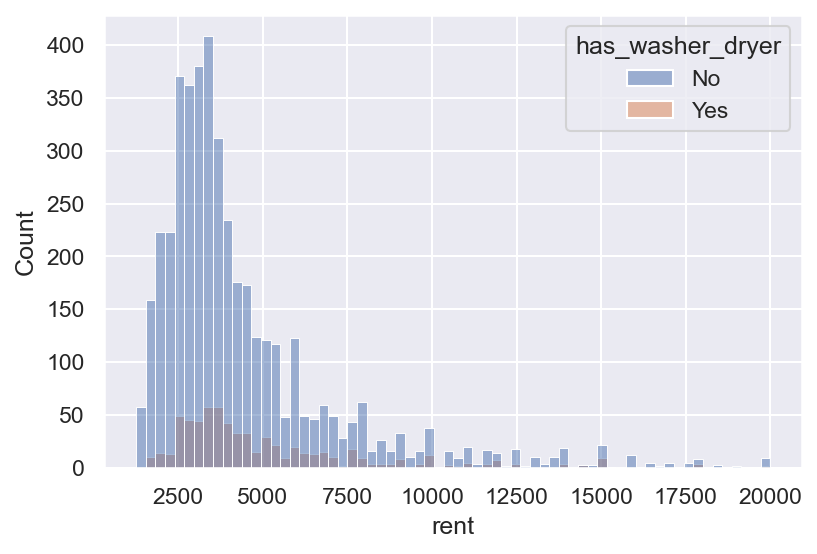

In [79]:
fig, ax = plt.subplots()
ax = sns.histplot(data=data, x='rent', hue='has_washer_dryer', alpha=0.5)

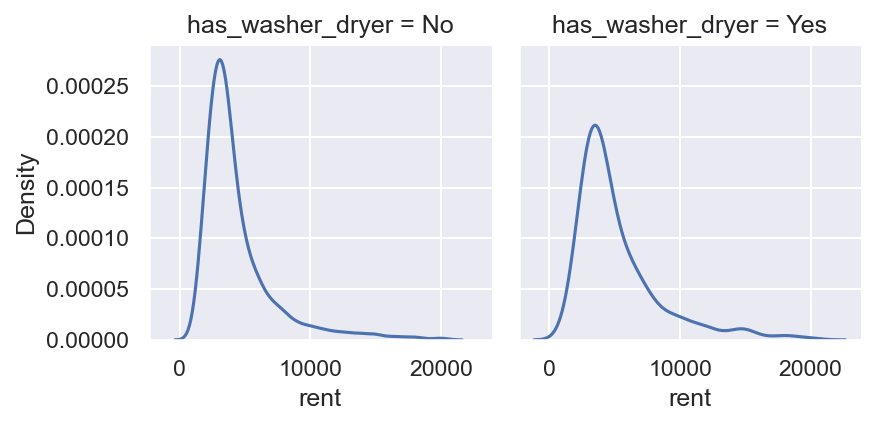

In [80]:
fig = sns.FacetGrid(data, col='has_washer_dryer')
fig.map(sns.kdeplot, 'rent')

Evidently there are far more units that do not have in-unit washer/dryer's than those that do, with the concentration of the former also having a higher concentration of units at a lower rent.

However, the size of these two groups is very different. We can compare them using normalized histograms, and take random samples of each group to conduct multiple t tests to determine if the difference in each groups average rent is significant. 

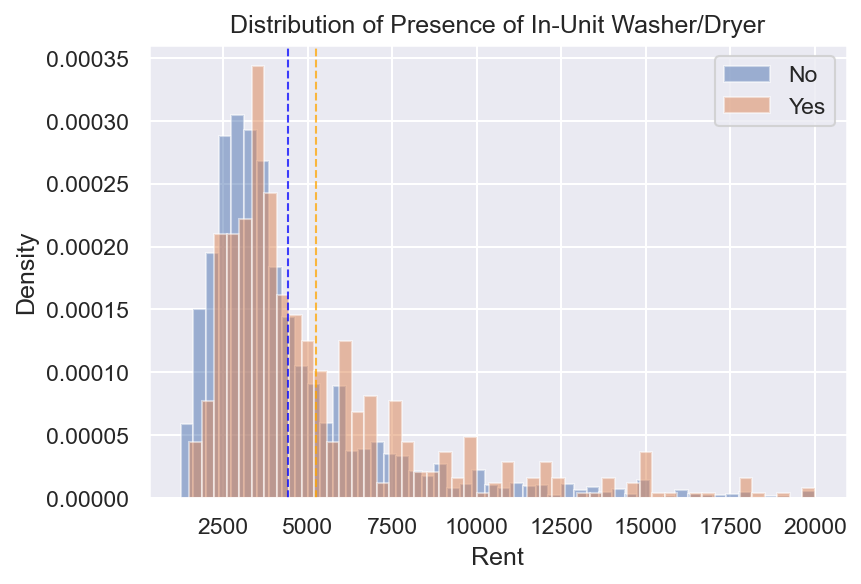

In [81]:
plt.hist(x=data[data.has_washer_dryer=='No'].rent, density=True, alpha=0.5, bins=50)
plt.hist(x=data[data.has_washer_dryer=='Yes'].rent, density=True, alpha=0.5, bins=50)
plt.legend(['No', 'Yes'])
plt.title('Distribution of Presence of In-Unit Washer/Dryer')
plt.ylabel('Density')
plt.xlabel('Rent')
plt.axvline(data[data.has_washer_dryer=='No'].rent.mean(), color = 'blue', linewidth=1, linestyle='dashed', alpha=0.75)
plt.axvline(data[data.has_washer_dryer=='Yes'].rent.mean(), color = 'orange', linewidth=1, linestyle='dashed', alpha=0.75)

plt.show()


In [82]:
import scipy.stats as stats

In [83]:
# print(len(data[data.has_washer_dryer=='Yes']))  # 669
# print(len(data[data.has_washer_dryer=='No']))  # 4331

t_val = 0
p_val = 0
for i in range(100):
    test_results = stats.ttest_ind(data[data.has_washer_dryer=='No'].sample(30).rent, data[data.has_washer_dryer=='Yes'].sample(30).rent)
    t_val += test_results[0]
    p_val += test_results[1]
print('T-stat: ' + str(t_val/100) + '\np-value: ' + str(p_val/100))


T-stat: -1.128855526971369
p-value: 0.31565083940882077


The results of this t-test are quite indicative that the difference between the average rent of the two groups is close to or equal to zero.

### How costly is living by a subway station in Brooklyn/Queens?

In [84]:
subway = data[data.neighborhood.isin(['Brooklyn Heights', 'Queens Village'])][['rent', 'min_to_subway']].copy()
subway.rename(columns={'min_to_subway':'minutes'}, inplace=True)
subway.head()

,rent,minutes
17,4900,6
93,3045,1
371,5300,6
390,6300,0
400,5145,1


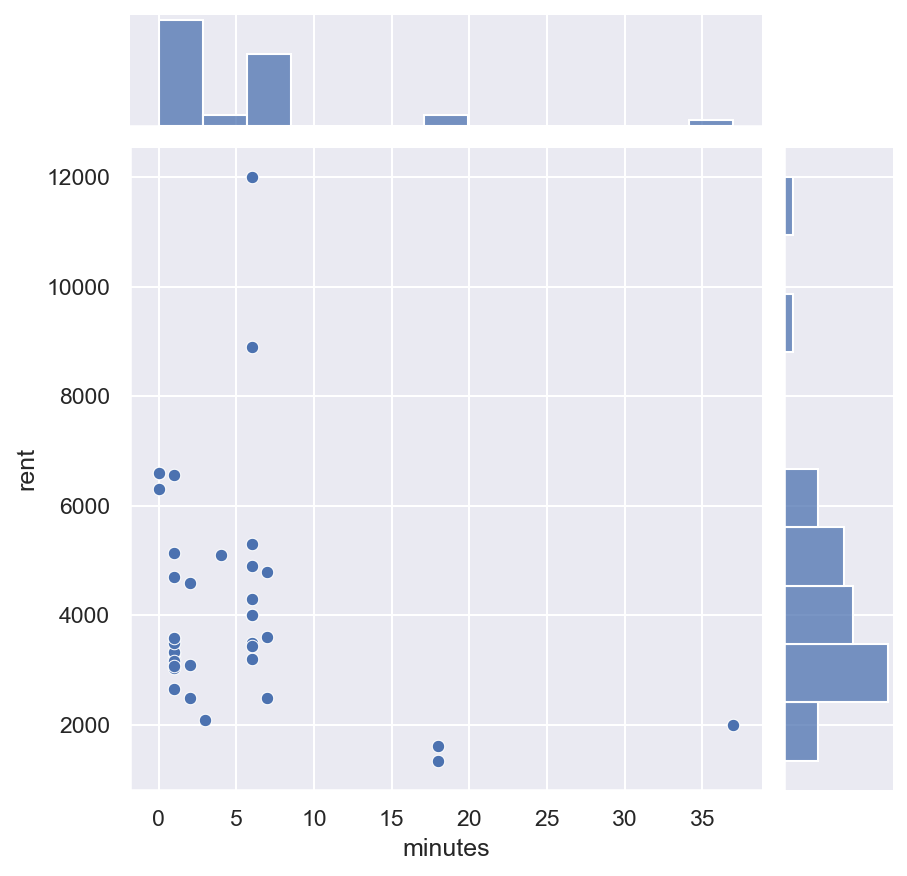

In [85]:
sns.jointplot(data=subway, x='minutes', y='rent')

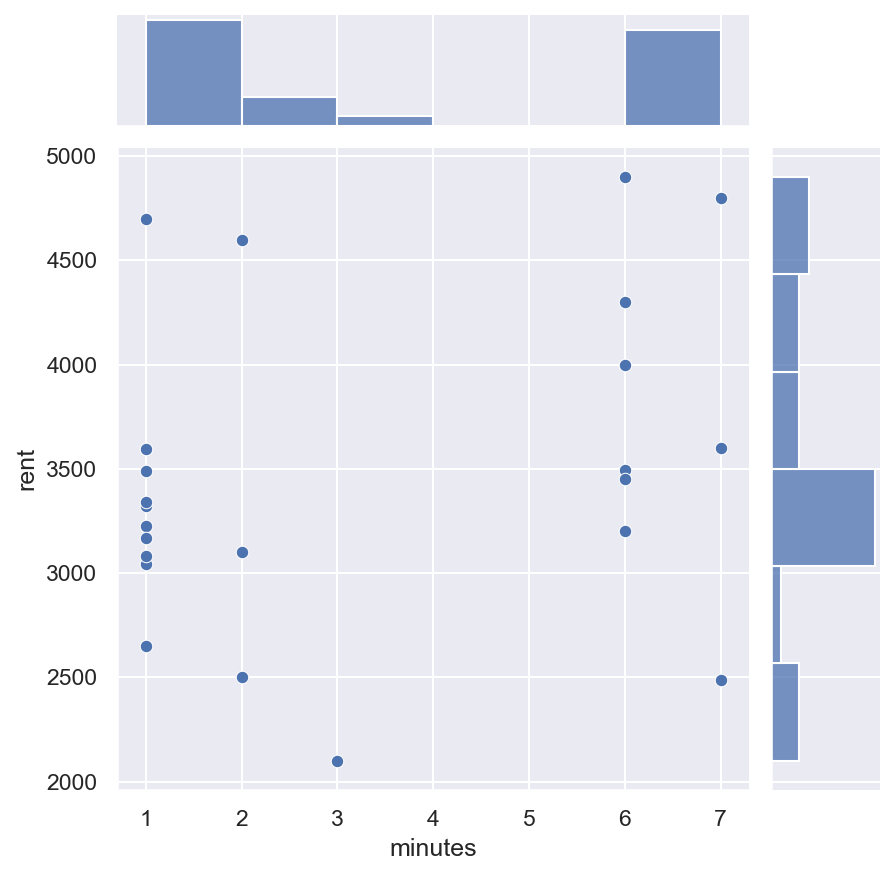

In [86]:
#  view outer dots as outliers. 
subway_adj = subway[(subway.minutes < 15) & (subway.rent < 5000)].copy()
sns.jointplot(data=subway_adj, x='minutes', y='rent')

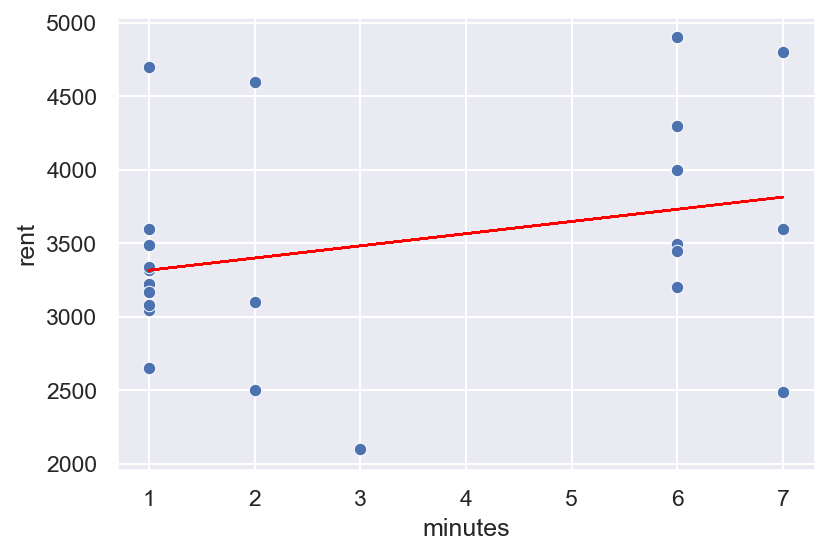

In [87]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data=subway_adj, x='minutes', y='rent')

lm = LinearRegression()
lm.fit(subway_adj.minutes.values.reshape(-1,1), subway_adj.rent.values.reshape(-1,1))
y_pred = lm.predict(subway_adj.minutes.values.reshape(-1,1))
plt.plot(subway_adj.minutes, y_pred, color='red', linewidth=1);

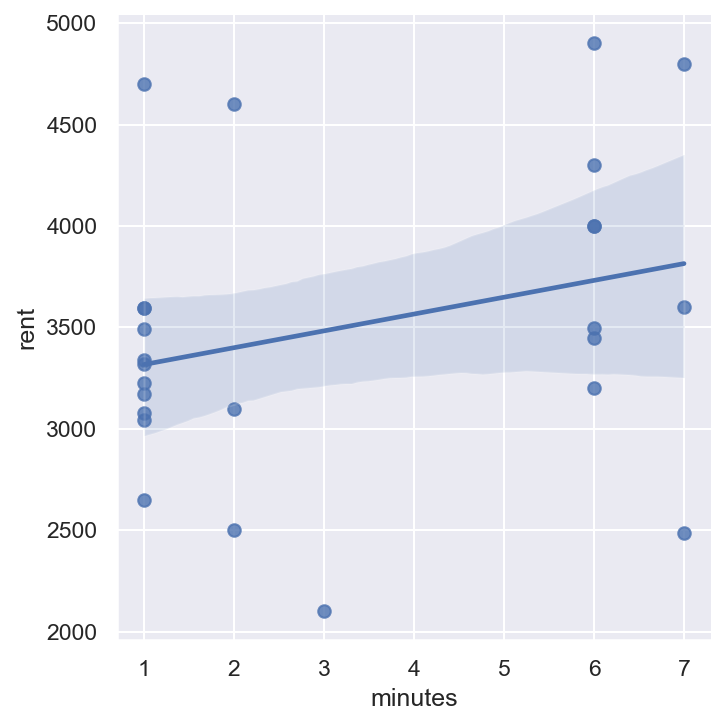

In [88]:
g = sns.lmplot(data=subway_adj, x='minutes', y='rent')
# Just trying out the lmplot

In [89]:
from scipy.stats import pearsonr

In [90]:
rent = subway_adj.rent
minutes = subway_adj.minutes
corr, p_value = pearsonr(minutes, rent)
print(corr)

0.28612877925709573


I filtered the data to exclude units more than 15 minutes away because they were far too scarce and should be considered outliers. To my surprise, apartments in Brooklyn and Queens (within relatively close distance to subway stations) are actually correlated with higher rent prices as you move away from subway stations, although the correlation is not particularly strong. 

We can now answer the final question: 

### Is a tenant over or underpaying?

Obviously there is lots of additional information to answer this question, of which other models can be used to complement our answer. However, for the sake of this example I will only be addressing has_washer_dryer and minutes to subway. 

I will first split the data into tenants with or without washer/dryers, and then we can use a use a linear model for each group to determine how their rent compares to what our model predicts given minutes to subway. 

In [91]:
#make two lm's ; one for each category of washer/dryer
# take a tenant; whether they have washer/dryer and what their rent is, how many mins to subway
# return whether they are below or above what model predicts and by how much

lm0 = LinearRegression()  # No washer/dryer
lm0.fit(data[data.has_washer_dryer=='No'].copy().min_to_subway.values.reshape(-1,1), data[data.has_washer_dryer=='No'].copy().rent.values.reshape(-1,1))
y_pred0 = lm0.predict(data[data.has_washer_dryer=='No'].copy().min_to_subway.values.reshape(-1,1))


lm1 = LinearRegression()  # washer/dryer
lm1.fit(data[data.has_washer_dryer=='Yes'].copy().min_to_subway.values.reshape(-1,1), data[data.has_washer_dryer=='Yes'].copy().rent.values.reshape(-1,1))
y_pred1 = lm1.predict(data[data.has_washer_dryer=='Yes'].copy().min_to_subway.values.reshape(-1,1))

def assess_rent(has_wd, rent, mins):  # has_wd --> has washer/dryer
    if has_wd == False:
        pred = lm0.predict([[mins]])[0][0]  # instead of using np.reshape() and unpacks in same line
        rent_diff = pred - rent
        if rent_diff < 0:
            return ('Tenant is paying {} per month, {} more than the expected {}'.format(str(rent), abs(rent_diff), pred))
        else:
            return ('Tenant is paying {} per month, {} less than the expected {}'.format(str(rent), abs(rent_diff), pred))
    else:
        pred = lm1.predict([[mins]])[0][0]
        rent_diff = pred - rent
        if rent_diff < 0:
            return ('Tenant is paying {} per month, {} more than the expected {}'.format(str(rent), abs(rent_diff), pred))
        else:
            return ('Tenant is paying {} per month, {} more than the expected {}'.format(str(rent), abs(rent_diff), pred))

print(assess_rent(True, 5000, 5))
print(assess_rent(True, 2000, 2))
print(assess_rent(False, 5000, 11))
print(assess_rent(False, 1700, 4))



Tenant is paying 5000 per month, 262.34105881032247 more than the expected 5262.3410588103225
Tenant is paying 2000 per month, 3096.5793295363237 more than the expected 5096.579329536324
Tenant is paying 5000 per month, 605.6834193451086 more than the expected 4394.316580654891
Tenant is paying 1700 per month, 2732.2859808152207 less than the expected 4432.285980815221


We addressed all of our questions, and found the following:

1. Does having a washer/dryer in unit increase the price of rent?
    - Although the data appeared to suggest that the average price of a unit with a washer/dryer is slightly higher than one without, significance tests demonstrated that this was not the case, hence the average price of a unit with an in unit washer/dryer has the same average price as those without one.
2. How costly is living by a subway station (in Brooklyn/Queens)?
    - Using a linear model to model this data was likely not the best model to use, however it suggests that in Brooklyn/Queens, apartments within relatively close proximity to subway stations actually increase in price as you move away from the station.
3. Is a tenant over or underpaying?
    - We constructed a function that determines if a tenant is overpaying/underpaying on their rent using a linear model for reference, using the presence of a washer/dryer and minutes to subway as predictors of rent.